In [1]:
from imp import reload
import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
from glob import glob
# Use Type 1 fonts in plots.
matplotlib.rcParams['ps.useafm'] = True
matplotlib.rcParams['pdf.use14corefonts'] = True
matplotlib.rcParams['text.usetex'] = False
# Do not wrap long lines
np.set_printoptions(linewidth=np.nan)
sns.set_style("whitegrid")
import runner
import umm
import mallows_hamming as mh

In [2]:
# instance synthetic, the best sol is
n = 20
flow = np.random.random((n,n))
for i in range(n):
    for j in range(n):
        if i==j: flow[i,i]=0
        else: flow[i,j] += 1/(abs(i-j))
for i in range(n):
    for j in range(n):
#         print(round(flow[i,j],4), " ", end="")
        print(round((abs(i-j)),4), " ", end="") #distance between locations
    print()

0  1  2  3  4  5  6  7  8  9  10  11  12  13  14  15  16  17  18  19  
1  0  1  2  3  4  5  6  7  8  9  10  11  12  13  14  15  16  17  18  
2  1  0  1  2  3  4  5  6  7  8  9  10  11  12  13  14  15  16  17  
3  2  1  0  1  2  3  4  5  6  7  8  9  10  11  12  13  14  15  16  
4  3  2  1  0  1  2  3  4  5  6  7  8  9  10  11  12  13  14  15  
5  4  3  2  1  0  1  2  3  4  5  6  7  8  9  10  11  12  13  14  
6  5  4  3  2  1  0  1  2  3  4  5  6  7  8  9  10  11  12  13  
7  6  5  4  3  2  1  0  1  2  3  4  5  6  7  8  9  10  11  12  
8  7  6  5  4  3  2  1  0  1  2  3  4  5  6  7  8  9  10  11  
9  8  7  6  5  4  3  2  1  0  1  2  3  4  5  6  7  8  9  10  
10  9  8  7  6  5  4  3  2  1  0  1  2  3  4  5  6  7  8  9  
11  10  9  8  7  6  5  4  3  2  1  0  1  2  3  4  5  6  7  8  
12  11  10  9  8  7  6  5  4  3  2  1  0  1  2  3  4  5  6  7  
13  12  11  10  9  8  7  6  5  4  3  2  1  0  1  2  3  4  5  6  
14  13  12  11  10  9  8  7  6  5  4  3  2  1  0  1  2  3  4  5  
15  14  13  12 

## Running UMM and CEGO over one instance

The next cell allows running CEGO and UMM over a chosen instance and with the selected parameters

In [124]:
reload(runner)
res = []
# budgetGA=10**3#
# instance_name="LOP-synthetic,seed=123456,n=20,m=200,phi=0.5"
instance_name = "pfsp_csum/tai20_5_3.fsp"
# instance_name="pfsp_csum/rec19.txt"
# instance_name="lop/RandB/N-p50-01"
# instance_name="lop/Spec/N-pal13"
# instance_name="lop/xLOLIB/N-be75eec_150"
# instance_name="qap/nug12.dat"
# instance_name="qap/test.dat"
out_filename = "pickles/"+instance_name.replace("/", "_").replace(".txt", "")
seed=3
budget=400
m_ini=10
# estos son los parámetros que deberíamos probar
eval_ranks = False # True
dist_name = 'kendall' # 'hamming'
scalfun_learning = 'exp' 
scalfun_sampling = 'log' # linear

df = runner.run_once("UMM", instance_name, seed,budget = budget, m_ini = m_ini, 
                     out_filename = out_filename, eval_ranks=eval_ranks,init='random', dist_name=dist_name,
                    scalfun_learning=scalfun_learning, scalfun_sampling=scalfun_sampling)


Reading instance from pfsp_csum/tai20_5_3.fsp
header: number of jobs, number of machines, initial seed, upper bound and lower bound :



In [3]:
df = pd.read_csv(out_filename+ '.csv.xz')
df
plt.figure(figsize=(15,2))
# df.rho.plot(logy=True)
# plt.show()
# df.rho.plot(logy=False)
# print("instance name", df.instance.iloc[0], "- time", round(df.run_time.iloc[0], 2))
# print(df.Fitness.min())

color_variable = 'Solver'
y_variables = ['Fitness']#,'Distance','phi_sample'
palette = sns.color_palette("husl", len(df[color_variable].drop_duplicates()))
for y_variable in y_variables:
    plt.figure(figsize=(15,5))
    sns.lineplot(x='Function evaluations',y=y_variable,hue='Solver',data=df, palette=palette)
#     plt.savefig('img/'+instance_name.replace("/", "__").replace(".txt", "")+'order.eps')
    plt.show()

NameError: name 'out_filename' is not defined

- TFT pfsp_csum/tai20_5_8.fsp.txt"

    - budget=1000  -> 60k

    - budget=5000  -> 60k

    - best sols TFT https://www.researchgate.net/figure/Best-known-solutions-for-Taillards-benchmarks-with-respect-to-total-flowtime-criterion_tbl8_223094938
  
- makespan  pfsp_cmax/tai20_5_8.fsp.txt"

    - best sols makespan https://www.researchgate.net/publication/269820959_Handling_ties_in_heuristics_for_the_permutation_flow_shop_scheduling_problem/link/5e31680ba6fdccd9657373fd/download

In [2]:
def read_alldata():
    lis = []
    for filename in glob("./results/**/*.csv.xz", recursive=True): 
        lis.append(pd.read_csv(filename))
    return pd.concat(lis, sort = True)
df = read_alldata()
df = df[~df.scalfun_sampling.isna()] # select just the new ones
# print(df.groupby([ 'Problem', 'Solver',
#        'budget', 'dist_name', 'eval_ranks', 'init',
#        'instance',
#         'scalfun_learning', 'scalfun_sampling', 'seed',
# ]).size())
df["Solver"] = df["Solver"].astype(str) +'_'+ df["dist_name"].astype(str) +'_'+ df["eval_ranks"].astype(str) +'_'+  df["budget"].astype(str)+'_'+  df["init"].astype(str)+'_'+  df["scalfun_learning"].astype(str)+'_'+  df["scalfun_sampling"].astype(str)


In [3]:
df[(df['Function evaluations']==1)].groupby(['Solver', 'instance'] ).size()#(df.seed==1) & 


Solver                             instance           
UMM_hamming_0_1000_random_exp_log  lop/IO/N-t59b11xx      20
                                   lop/IO/N-t59d11xx      20
                                   lop/RandB/N-p40-01     20
                                   lop/RandB/N-p40-02     20
                                   lop/RandB/N-p50-01     20
                                   lop/RandB/N-p50-02     20
                                   lop/SGB/N-sgb75.01     20
                                   lop/SGB/N-sgb75.02     20
                                   pfsp_cmax/rec19.txt    20
                                   pfsp_cmax/rec31.txt    20
                                   qap/kra32.dat          20
                                   qap/nug12.dat          20
                                   qap/nug30.dat          20
                                   qap/tho30.dat          20
UMM_hamming_0_500_random_exp_log   lop/IO/N-t59b11xx      20
                              

instance:  lop/IO/N-t59d11xx
Saving to img/fitness_lop_IO_N-t59d11xx.pdf


findfont: Font family ['sans-serif'] not found. Falling back to Helvetica.
findfont: Font family ['sans-serif'] not found. Falling back to Helvetica.


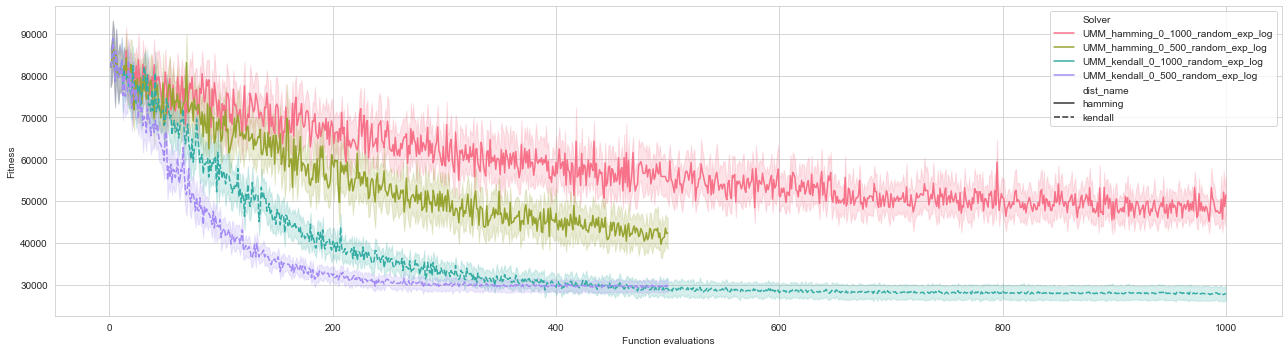

instance:  lop/IO/N-t59b11xx
Saving to img/fitness_lop_IO_N-t59b11xx.pdf


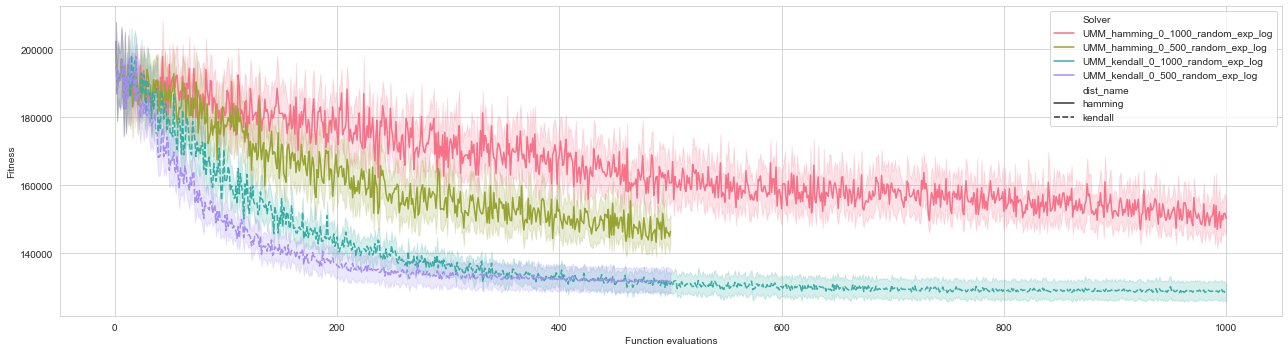

instance:  lop/SGB/N-sgb75.01
Saving to img/fitness_lop_SGB_N-sgb75_01.pdf


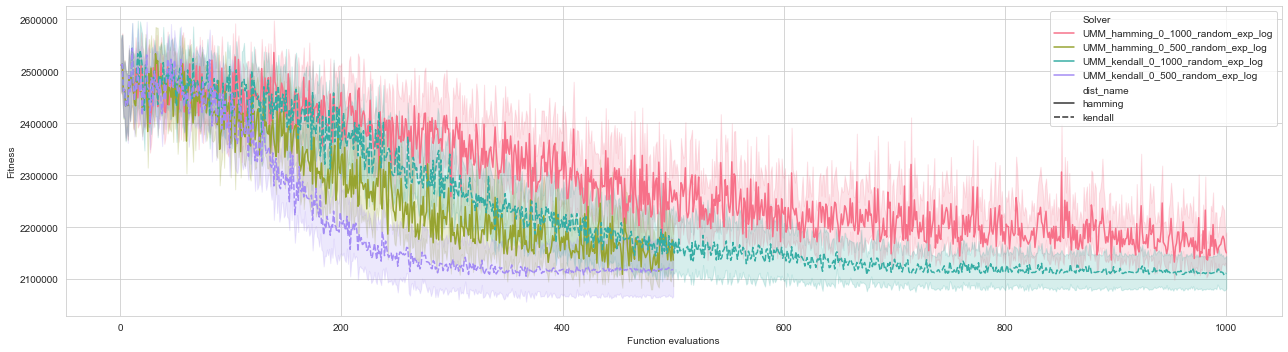

instance:  lop/SGB/N-sgb75.02
Saving to img/fitness_lop_SGB_N-sgb75_02.pdf


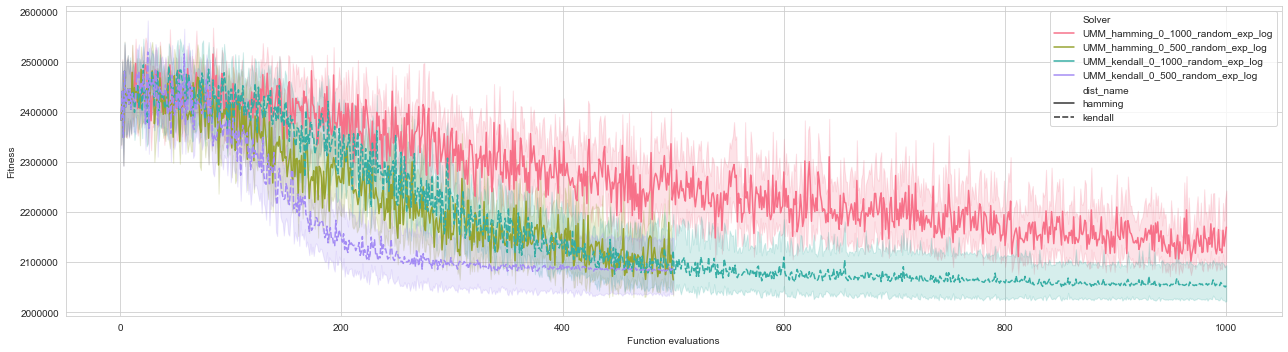

instance:  lop/RandB/N-p40-02
Saving to img/fitness_lop_RandB_N-p40-02.pdf


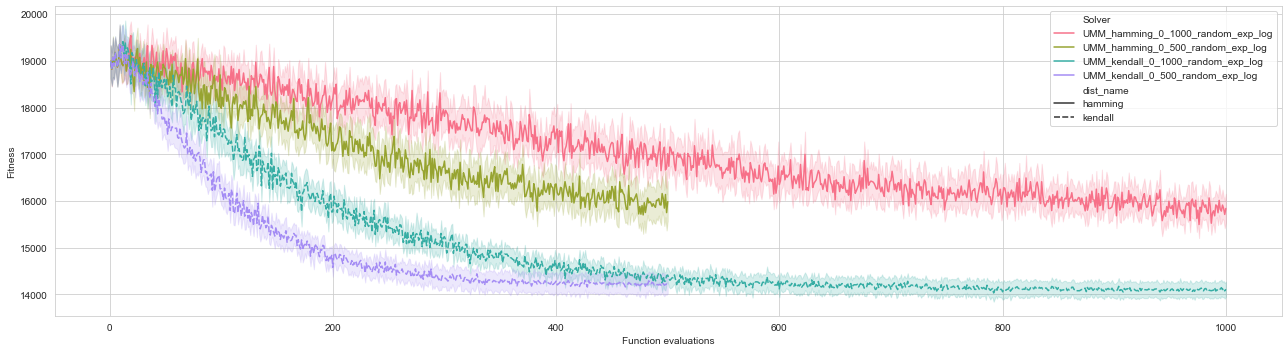

instance:  lop/RandB/N-p50-02
Saving to img/fitness_lop_RandB_N-p50-02.pdf


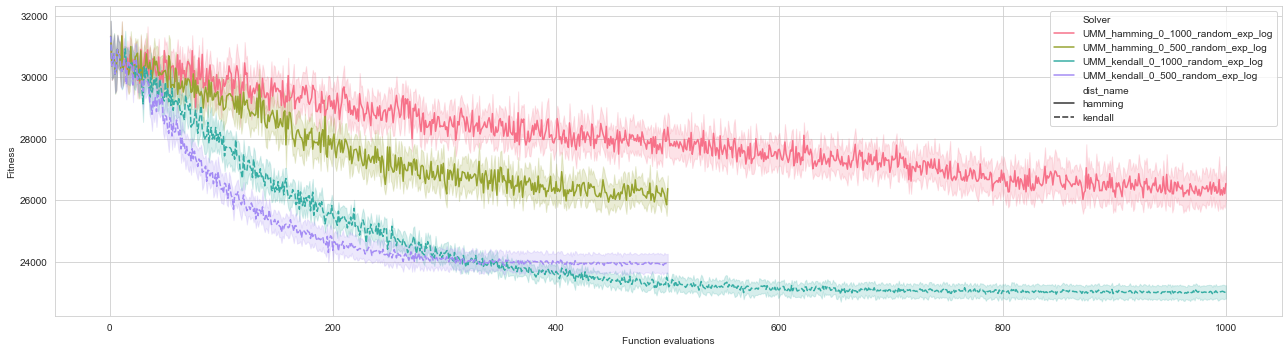

instance:  lop/RandB/N-p50-01
Saving to img/fitness_lop_RandB_N-p50-01.pdf


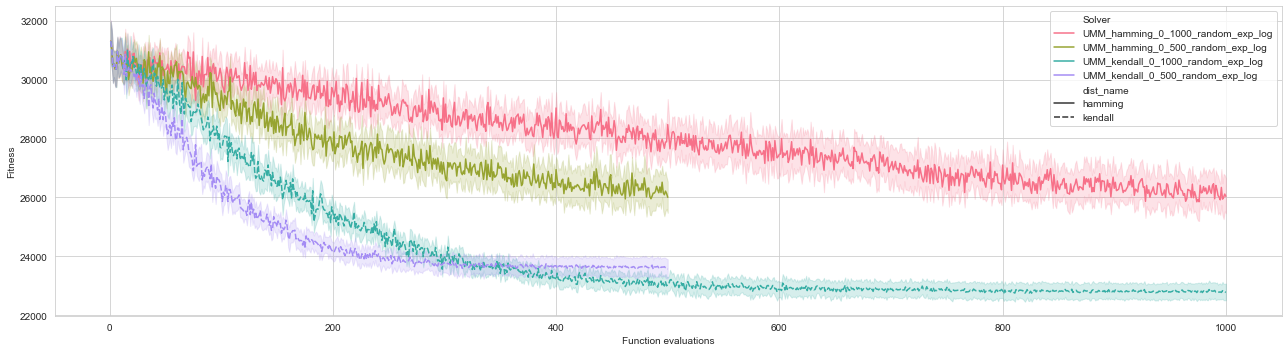

instance:  lop/RandB/N-p40-01
Saving to img/fitness_lop_RandB_N-p40-01.pdf


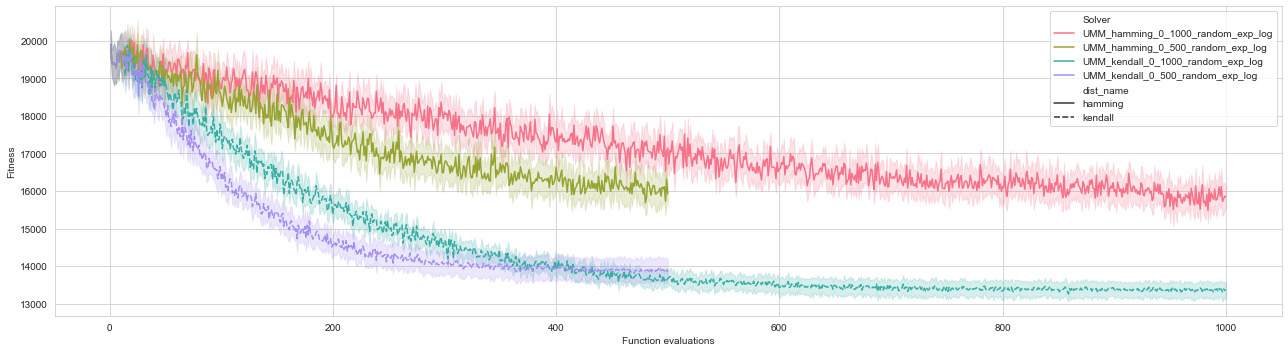

instance:  qap/tho30.dat
Saving to img/fitness_qap_tho30_dat.pdf


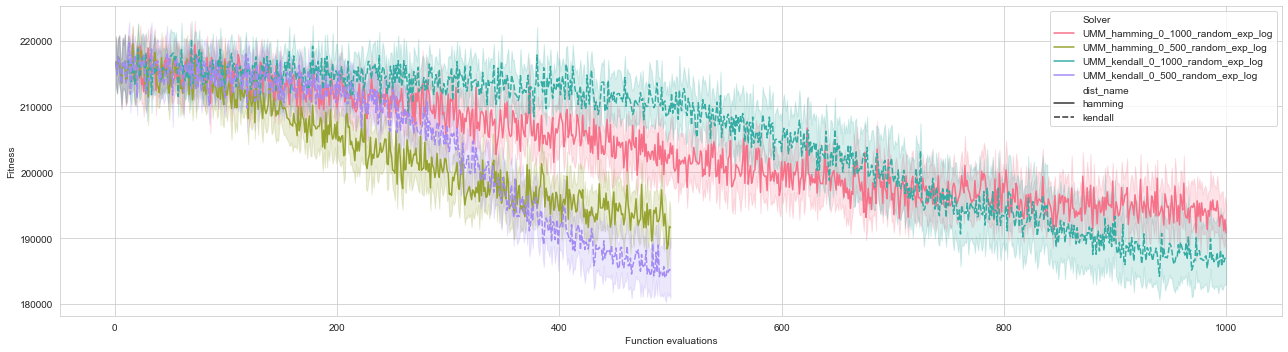

instance:  qap/kra30a.dat
Saving to img/fitness_qap_kra30a_dat.pdf


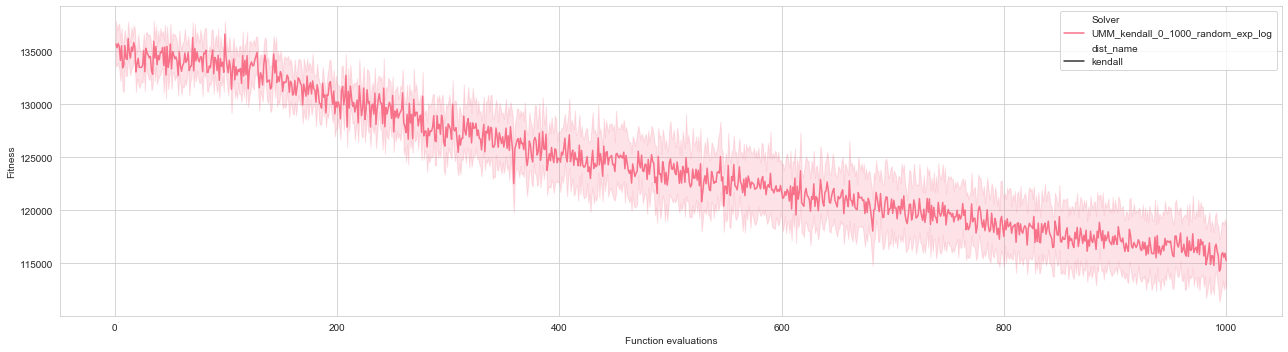

instance:  qap/nug12.dat
Saving to img/fitness_qap_nug12_dat.pdf


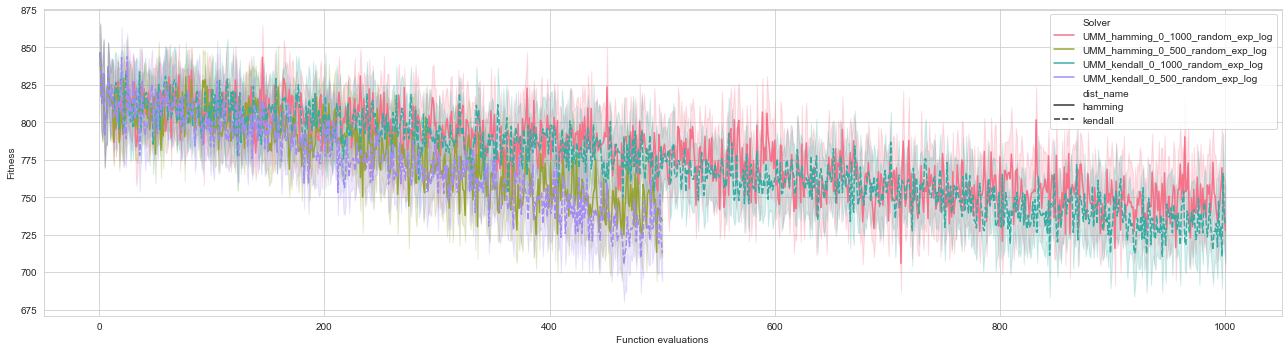

instance:  qap/kra30b.dat
Saving to img/fitness_qap_kra30b_dat.pdf


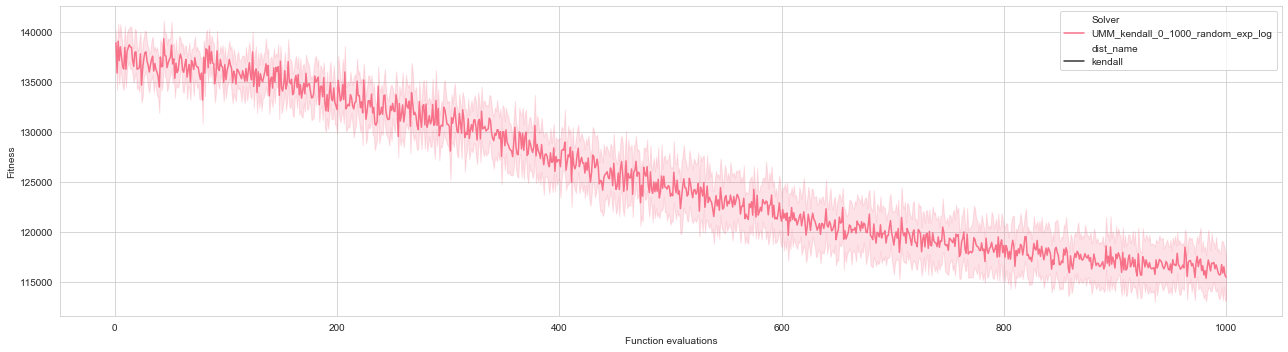

instance:  qap/kra32.dat
Saving to img/fitness_qap_kra32_dat.pdf


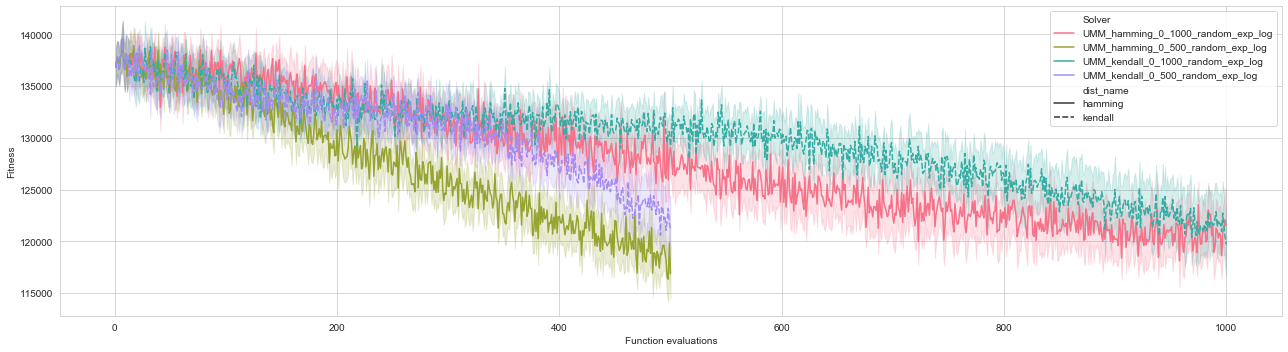

instance:  qap/nug30.dat
Saving to img/fitness_qap_nug30_dat.pdf


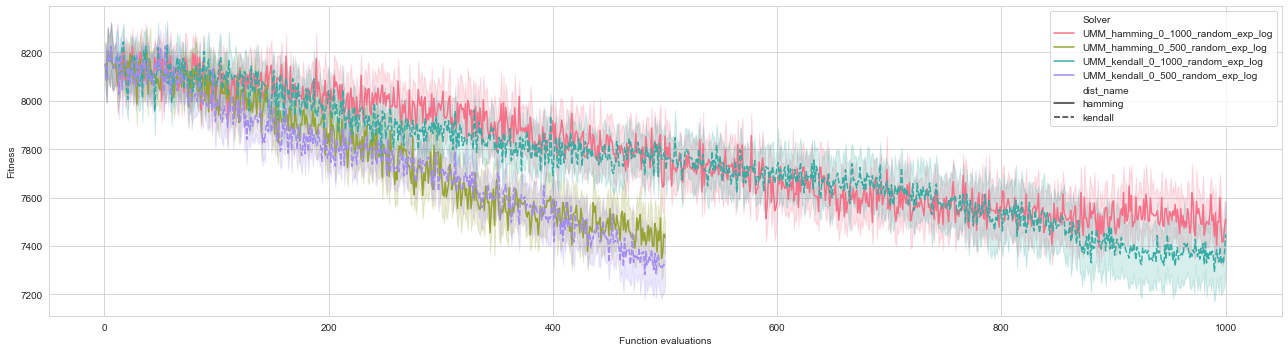

instance:  pfsp_cmax/rec31.txt
Saving to img/fitness_pfsp_cmax_rec31_txt.pdf


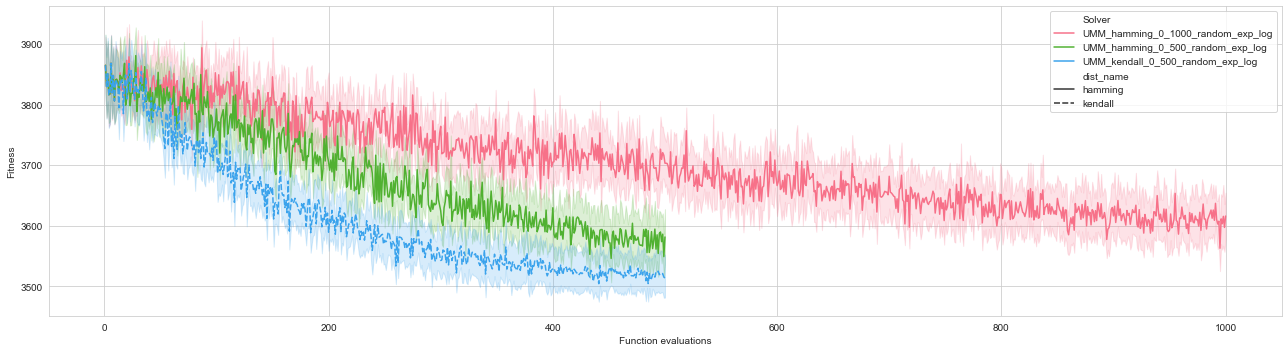

instance:  pfsp_cmax/rec19.txt
Saving to img/fitness_pfsp_cmax_rec19_txt.pdf


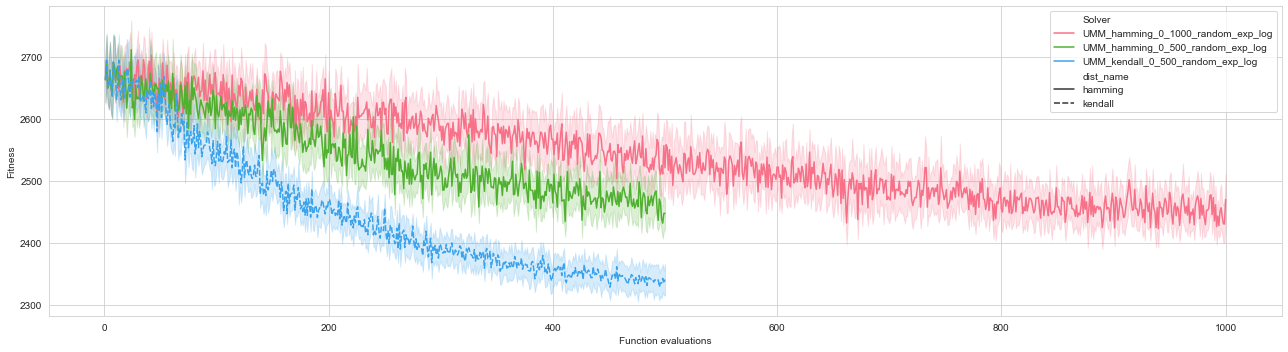

In [4]:

for inst in df.instance.drop_duplicates():
  subdf = df[df.instance.str.contains(inst)].sort_values('Solver')
  print("instance: ", inst)
  plt.figure(figsize=(18,5))
  palette = sns.color_palette("husl", subdf['Solver'].nunique())
  g = sns.lineplot(x='Function evaluations', y='Fitness', hue='Solver', style='dist_name', data=subdf, palette=palette)
#   g.set(xlim=(-1, 401))
  plt.tight_layout()
  filename = 'img/fitness_v2_' + subdf.instance.iloc[0].replace('/','_').replace('.','_') + '.pdf'
  print("Saving to " + filename)
  plt.savefig(filename)
  plt.show()

In [ ]:
df.groupby([        'budget', 'dist_name'].


In [11]:
df[df['Function evaluations'] == df.budget].groupby(['budget', 'dist_name']).run_time.mean()

budget  dist_name
500     hamming      20.640974
        kendall       6.787032
1000    hamming      53.832566
        kendall      18.205495
Name: run_time, dtype: float64